В качестве домашнего задания вам предлагается поработать над предсказанием погоды. Файл с данными вы найдете в соответствующей директории. Вам будет доступен датасет weather.csv, ПЕРВЫЕ 75% (shuffle = False) которого нужно взять для обучения, последние 25% - для тестирования.

Требуется построить 4 модели которые будут предсказывать целевую переменную <b>RainTomorrow</b> с помощью:

   1. логистической регрессии [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
   
   2. метода ближайших соседей [sklearn.neighbors](https://scikit-learn.org/stable/modules/neighbors.html)
 
   3. Байесовского классификатора [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
   
   4. логистической регрессии реализованной самостоятельно

Затем следует сравнить результаты моделей (по качеству и времени выполнения) и сделать вывод о том, какая модель и с какими параметрами даёт лучшие результаты.

Не забывайте о том, что работа с признаками играет очень большую роль в построении хорошей модели.

Краткое описание данных:

    Date - Дата наблюдений
    Location - Название локации, в которой расположена метеорологическая станция
    MinTemp - Минимальная температура в градусах цельсия
    MaxTemp - Максимальная температура в градусах цельсия
    Rainfall - Количество осадков, зафиксированных за день в мм
    Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
    Sunshine - Число солнечных часов за день
    WindGustDir - направление самого сильного порыва ветра за последние 24 часа
    WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
    WindDir9am - направление ветра в 9 утра

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib notebook

### Анализ данных

In [2]:
data = pd.read_csv('weather.csv')
data

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
142189,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
142190,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
142191,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [3]:
data.RainTomorrow.replace({'No':0, 'Yes':1}, inplace=True)
data

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
142189,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
142190,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
142191,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0


#### Уберем столбец 'Unnamed: 0', т.к. он не несет полезной информации для нашей модели и разобьем выборку на тренировочную и тестовую

In [4]:
X = data.drop(columns=['Unnamed: 0'])

In [5]:
from sklearn.model_selection import train_test_split
y = X['RainTomorrow']
X = X.drop(columns=['RainTomorrow'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = False)

#### Выделим количественные признаки и найдем их корреляцию с таргетом

<IPython.core.display.Javascript object>


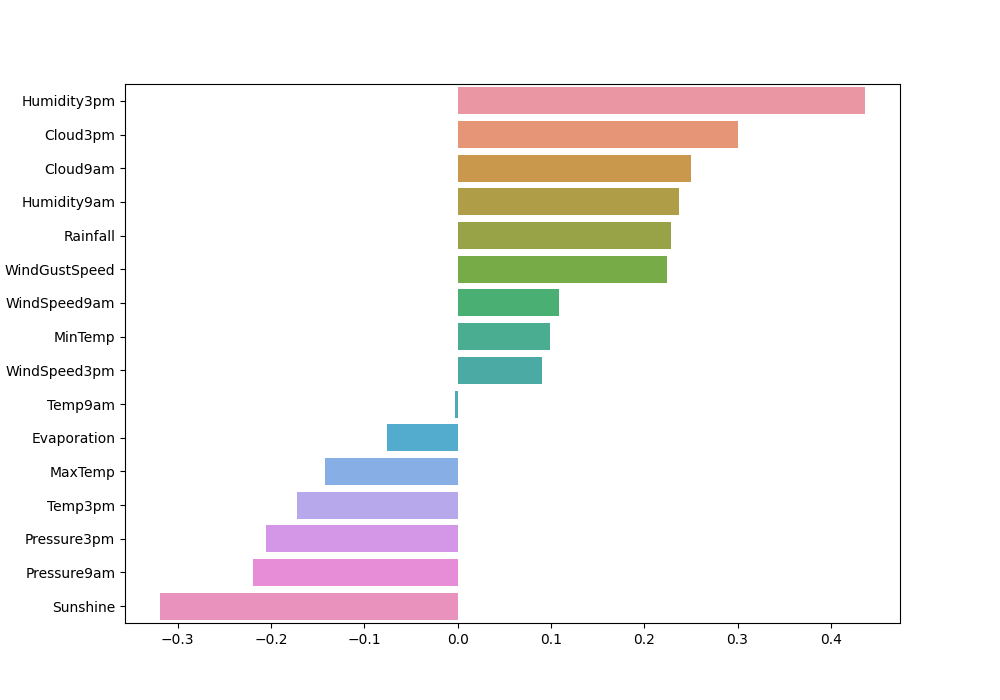

In [6]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(10, 7)

In [7]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000
mean,11.964425,22.738110,2.411648,5.339228,7.382788,39.797634,13.926053,18.768929,70.421607,52.691151,1018.042824,1015.695971,4.597829,4.655770,16.536189,21.253260
std,6.341251,6.934186,8.720208,3.286713,2.739124,13.468322,9.078152,9.109813,18.132487,20.444249,6.702939,6.612855,2.285687,2.113315,6.332634,6.714665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,7.400000,17.600000,0.000000,4.000000,7.382788,31.000000,7.000000,13.000000,59.000000,38.000000,1013.900000,1011.600000,4.000000,4.000000,11.900000,16.400000
50%,11.900000,22.400000,0.000000,5.339228,7.382788,39.000000,13.000000,18.768929,71.000000,53.000000,1018.042824,1015.695971,4.597829,4.655770,16.500000,21.000000
75%,16.800000,27.600000,0.800000,5.339228,8.300000,46.000000,19.000000,24.000000,84.000000,66.000000,1022.200000,1019.800000,7.000000,6.000000,21.100000,25.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,9.000000,38.600000,46.700000


#### Проанализируем распределения наших признаков

<IPython.core.display.Javascript object>


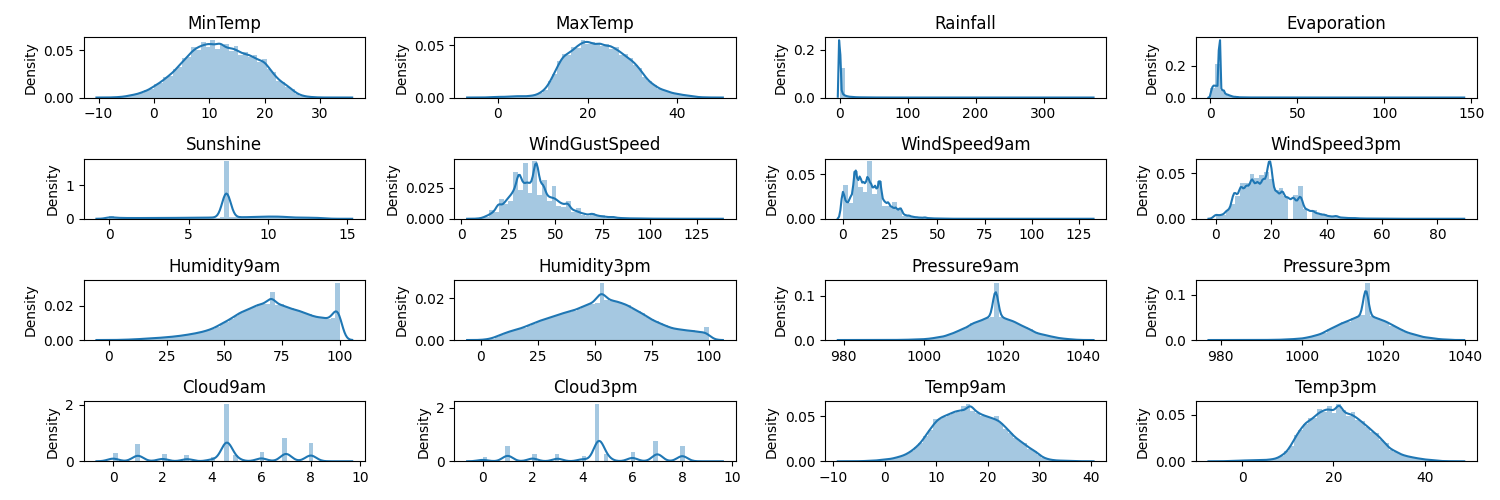

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(15, 5))
for i in range(4):
    for j in range(4):
        sns.distplot(ax=axes[i][j], x = X_train[numeric_features[i * 4 + j]])
        axes[i][j].set_title(numeric_features[i * 4 + j])

fig.tight_layout()
plt.show()

### Встроенная логистическая регрессия

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train[numeric_features], y_train)

LogisticRegression()

In [11]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='weighted')
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f'Accuracy: %.3f, precision: %.3f, recall: %.3f\n' % (accuracy, precision, recall))

Test MAE = 0.2524
Train MAE = 0.2685
Accuracy: 0.846, precision: 0.840, recall: 0.846



In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring="neg_mean_absolute_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MAE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -0.2333
	-0.3055
	-0.2723
	-0.2760
	-0.2890
	-0.2708
	-0.2536
	-0.2828
	-0.2949
	-0.2354
Mean CV MAE = 0.2714


In [13]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

<IPython.core.display.Javascript object>


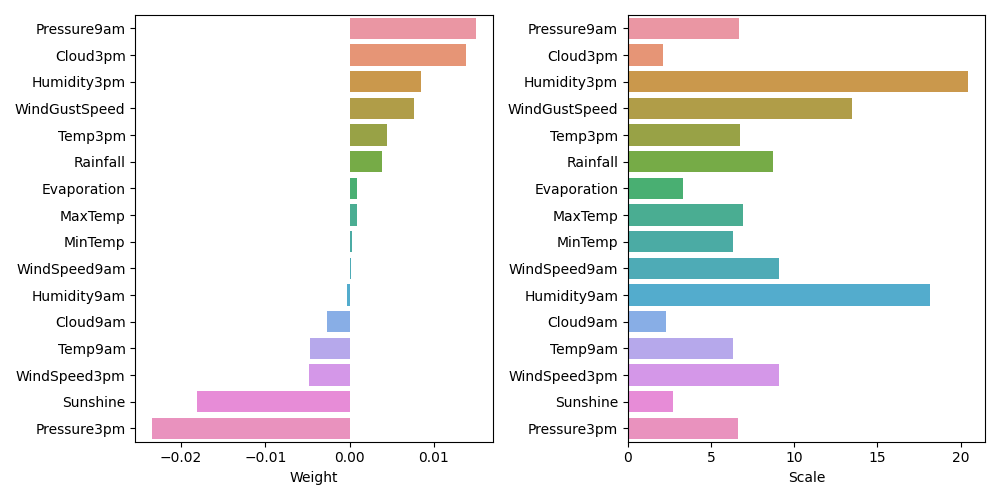

In [14]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

#### Попробуем нормализовать наши признаки

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='weighted')
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f'Accuracy: %.3f, precision: %.3f, recall: %.3f\n' % (accuracy, precision, recall))
model.coef_

Test MAE = 0.2524
Train MAE = 0.2685
Accuracy: 0.846, precision: 0.840, recall: 0.846



array([ 0.00195403,  0.0060835 ,  0.03380548,  0.00291871, -0.04966889,
        0.1023757 ,  0.00130601, -0.04390902, -0.00504155,  0.17332534,
        0.10087089, -0.15541542, -0.0062289 ,  0.02911661, -0.02934517,
        0.0302833 ])

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='weighted')
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f'Accuracy: %.3f, precision: %.3f, recall: %.3f\n' % (accuracy, precision, recall))

Accuracy: 0.846, precision: 0.840, recall: 0.846



<IPython.core.display.Javascript object>


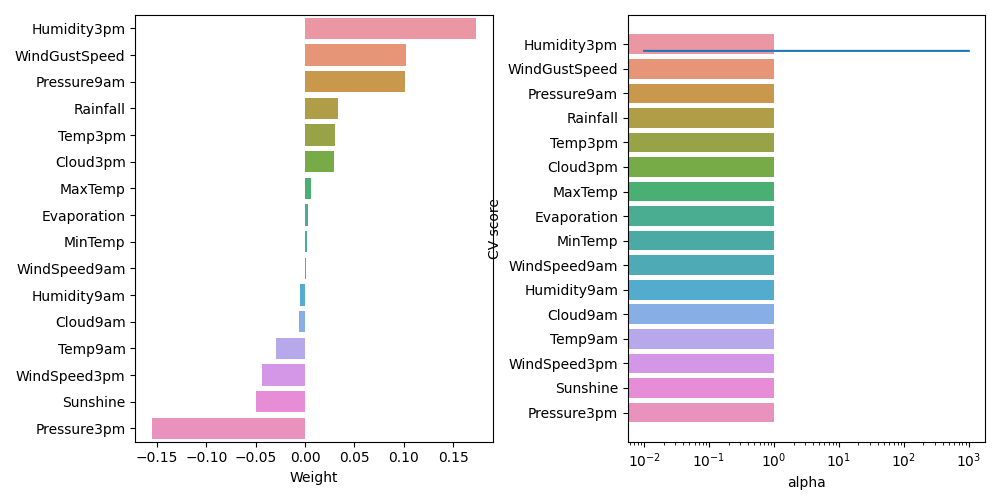

In [19]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

#### Подберем коэффициент регуляризации

In [20]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_absolute_error", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Best alpha = 0.0100


Text(501.94444444444446, 0.5, 'CV score')

In [21]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='weighted')
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f'Accuracy: %.3f, precision: %.3f, recall: %.3f\n' % (accuracy, precision, recall))

Test MAE = 0.2524
Accuracy: 0.846, precision: 0.840, recall: 0.846



#### Включим в рассмотрение категориальные признаки

In [22]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='weighted')
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f'Accuracy: %.3f, precision: %.3f, recall: %.3f\n' % (accuracy, precision, recall))

Test MAE = 0.2674
Accuracy: 0.840, precision: 0.828, recall: 0.840



### Метод ближайших соседей

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
for n in [2, 4, 8, 16, 50, 100, 200]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train[numeric_features], y_train)
    y_pred = knn.predict(X_test[numeric_features])
    y_train_pred = knn.predict(X_train[numeric_features])
    print(f'neighbours = {n}')
    print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
    print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))
    accuracy = accuracy_score(y_test, y_pred.round())
    precision = precision_score(y_test, y_pred.round(), average='weighted')
    recall = recall_score(y_test, y_pred.round(), average='weighted')
    print(f'Accuracy: %.3f, precision: %.3f, recall: %.3f\n' % (accuracy, precision, recall))
    print()

neighbours = 2
Test MAE = 0.1796
Train MAE = 0.1097
Accuracy: 0.820, precision: 0.803, recall: 0.820


neighbours = 4
Test MAE = 0.1696
Train MAE = 0.1276
Accuracy: 0.830, precision: 0.816, recall: 0.830


neighbours = 8
Test MAE = 0.1601
Train MAE = 0.1400
Accuracy: 0.840, precision: 0.829, recall: 0.840


neighbours = 16
Test MAE = 0.1565
Train MAE = 0.1469
Accuracy: 0.844, precision: 0.834, recall: 0.844


neighbours = 50
Test MAE = 0.1525
Train MAE = 0.1532
Accuracy: 0.848, precision: 0.841, recall: 0.848


neighbours = 100
Test MAE = 0.1516
Train MAE = 0.1550
Accuracy: 0.848, precision: 0.843, recall: 0.848


neighbours = 200
Test MAE = 0.1540
Train MAE = 0.1569
Accuracy: 0.846, precision: 0.842, recall: 0.846




### Байесовский классификатор

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train[numeric_features], y_train)
y_pred = gnb.predict(X_test[numeric_features])
y_train_pred = gnb.predict(X_train[numeric_features])
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round(), average='weighted')
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f'Accuracy: %.3f, precision: %.3f, recall: %.3f\n' % (accuracy, precision, recall))

Test MAE = 0.1635
Train MAE = 0.1919
Accuracy: 0.836, precision: 0.827, recall: 0.836



### Реализация логистической регрессии
__Логистическая регрессия__

$$p(y|x) = a(x, \theta) = \sigma(\langle x, \theta \rangle) = \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}$$

In [27]:
theta = np.array([1, 2, 3])

X =  np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
              ])

y = np.array([1, 1, 0, 0])

In [28]:
def probability(theta, X):
    result = 1 / (1 + np.exp(-np.dot(theta, np.transpose(X))))
    return result

prob = probability(theta, X)


assert type(prob) == np.ndarray, 'Возвращается неверный тип'
assert prob.shape == (X.shape[0],), 'Неверный размер массива'
assert (prob.round(3) == [0.998, 0.119, 0.731, 0.]).all(), 'Функция считается неверно'

Функция предсказания метки класса, получает на вход вероятности принадлежности к классу 1 и выдает метки классов $y \in \{0, 1\}$

In [29]:
def binary_class_prediction(theta, X, threshold =.5):
    prob =  probability(theta, X)
    r_vec = np.vectorize(round)
    result = r_vec(prob)
    return result

y_pred = binary_class_prediction(theta, X)


assert type(y_pred) == np.ndarray, 'Возвращается неверный тип'
assert y_pred.shape == (X.shape[0],), 'Неверный размер массива'
assert min(y_pred) == 0, 'Функция считается неверно'
assert max(y_pred) == 1, 'Функция считается неверно'

__Функционал качества логистической регрессии__

Запишем правдободовие выборки для меток класса $y \in \{+1, -1\}$ 

$$Likelihood(a, X^\ell) = \prod_{i = 1}^{\ell} a(x_i,\theta)^{[y_i = +1]} (1 - a(x_i, \theta))^{[y_i = -1]} → \operatorname*{max}_{\theta}$$ 

Прологарифмируем правдоподобие выборки и перейдем к задаче минимизации:

$$Q(a, X^\ell) =     -\sum_{i = 1}^{\ell} 
        [y_i = +1] \log a(x_i, \theta)
        +
        [y_i = -1] \log (1 - a(x_i, \theta)) \to \operatorname*{min}_{\theta}$$ 
        
Подставим $a(x, \theta)$ в функционал качества:

$$ Q(a, X^\ell) = -\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{\exp(-\langle \theta, x_i \rangle)}{1 + \exp(-\langle \theta, x_i \rangle)}
\right)
=\\
=
-\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{1}{1 + \exp(\langle \theta, x_i \rangle)}
\right)
=\\
=
\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) $$
    

Итоговый оптимизируемый функционал качества (logloss), записанный для меток классов $y \in \{+1, -1\}$ и усредненный по выборке

$$Q(a, X^\ell) = \frac{1}{\ell}\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) \to \operatorname*{min}_{\theta}$$

Реализуем его в функции logloss:

In [30]:
def logloss(theta, X, y): 
    l = X.shape[0]
    a = probability(theta, X)
    exponenta = -y * np.log(a) - (1 - y) * np.log(1 - a)
    result = 1 / l * sum(exponenta)
    print(result)
    return result

In [31]:
assert logloss(theta, X, y).round(3) == 0.861, 'Функция считается неверно'

0.8606664224002999


__Алгоритм оптимизации функционала качества. Стохастический градиентный спуск__

<b>Вход: </b> Выборка $X^\ell$, темп обучения $h$

<b>Выход: </b> оптимальный вектор весов $\theta$

1.  Инициализировать веса $\theta$
2.  Инициализировать оценку функционала качества: $Q(a, X^\ell)$
3.  <b>Повторять</b>: 

    Выбрать случайным образом подвыборку объектов $X^{batch} =\{x_1, \dots,x_n \}$ из $X^{\ell}$
    
    Рассчитать градиент функционала качества: $\nabla Q(X^{batch}, \theta)$
    
    Обновить веса: $\theta := \theta - h\cdot \nabla Q(X^{batch}, \theta)$
       
    <b>Пока</b> значение $Q$ и/или веса $\theta$ не сойдутся   

Реализуем функцию рассчета градиента функционала качества

$$\frac{\partial Q(a, X^{batch}) }{\partial \theta_j}   = \frac{\partial \frac{1}{n}\sum_{i = 1}^{n}
    \log \left(
        1 + \exp(- y_i \langle \theta, x_i \rangle)
    \right)} {\partial \theta_j}  = \frac{1}{n}\sum_{i = 1}^{n}
     \frac {1}{
        1 + \exp(- y_i \langle \theta, x_i \rangle)} \cdot  \exp(- y_i \langle \theta, x_i \rangle) \cdot -y_i x_{ij}$$

Реализуйте рассчет градиента в матричном виде:

In [32]:
def gradient_for_one_var(theta, X, y, j):
    n = X.shape[0]
    s = 0
    result = 1 / n * np.sum(1 / (1 + np.exp(-y * np.dot(theta, np.transpose(X)))) * np.exp(-y * np.dot(theta, np.transpose(X))) * (-y * np.transpose(X)[j]))
    print(result)
    return result

def gradient(theta, X, y):
    dimension = theta.shape[0]
    result = []
    for i in range(dimension):
        result.append(gradient_for_one_var(theta, X, y, i))
    
    return np.array(result)

assert gradient(theta, X, y).shape == theta.shape, 'Неверный размер массива'

0.21958111370531191
0.4397803831997825
-0.2208174252836293


Функция обучения уже реализована

In [33]:
def fit(X, y, batch_size=10, h=0.05,  iters=100, plot=True):

    # получаем размерности матрицы
    size, dim = X.shape

    # случайная начальная инициализация
    theta = np.random.uniform(size=dim)
    
    errors = []
    
    theta_history = theta
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]
    
    # plt 
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')
        
        
    for _ in range(iters):  
        
        # берём случайный набор элементов
        batch = np.random.choice(size, batch_size, replace=False)
        X_batch = X[batch]
        y_batch = y[batch]

        # считаем производные
        grad = gradient(theta, X_batch, y_batch)
        
        assert type(grad) == np.ndarray, 'неверный тип'
        assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
        assert grad.shape[0] == len(theta), 'длина вектора должна быть равной количеству весов'
        
        
        # Обновляем веса
        
        theta -= grad * h
        
        theta_history = np.vstack((theta_history, theta))
        
        # error
        loss = logloss(theta, X, y)
        errors.append(loss)
        
        if plot:
            ax1.clear()            
            ax1.scatter(range(dim), theta, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('theta')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')
            
            
            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('logloss')
            ax2.set_xlabel('itarations')
            
            ax3.plot(theta_history)
            ax3.set_title('update theta')
            ax3.set_ylabel('value')
            ax3.set_xlabel('itarations')
            time.sleep(0.05)
            fig.canvas.draw()   
            
    return theta

In [34]:
X, y = make_classification(n_samples=2000)

<IPython.core.display.Javascript object>


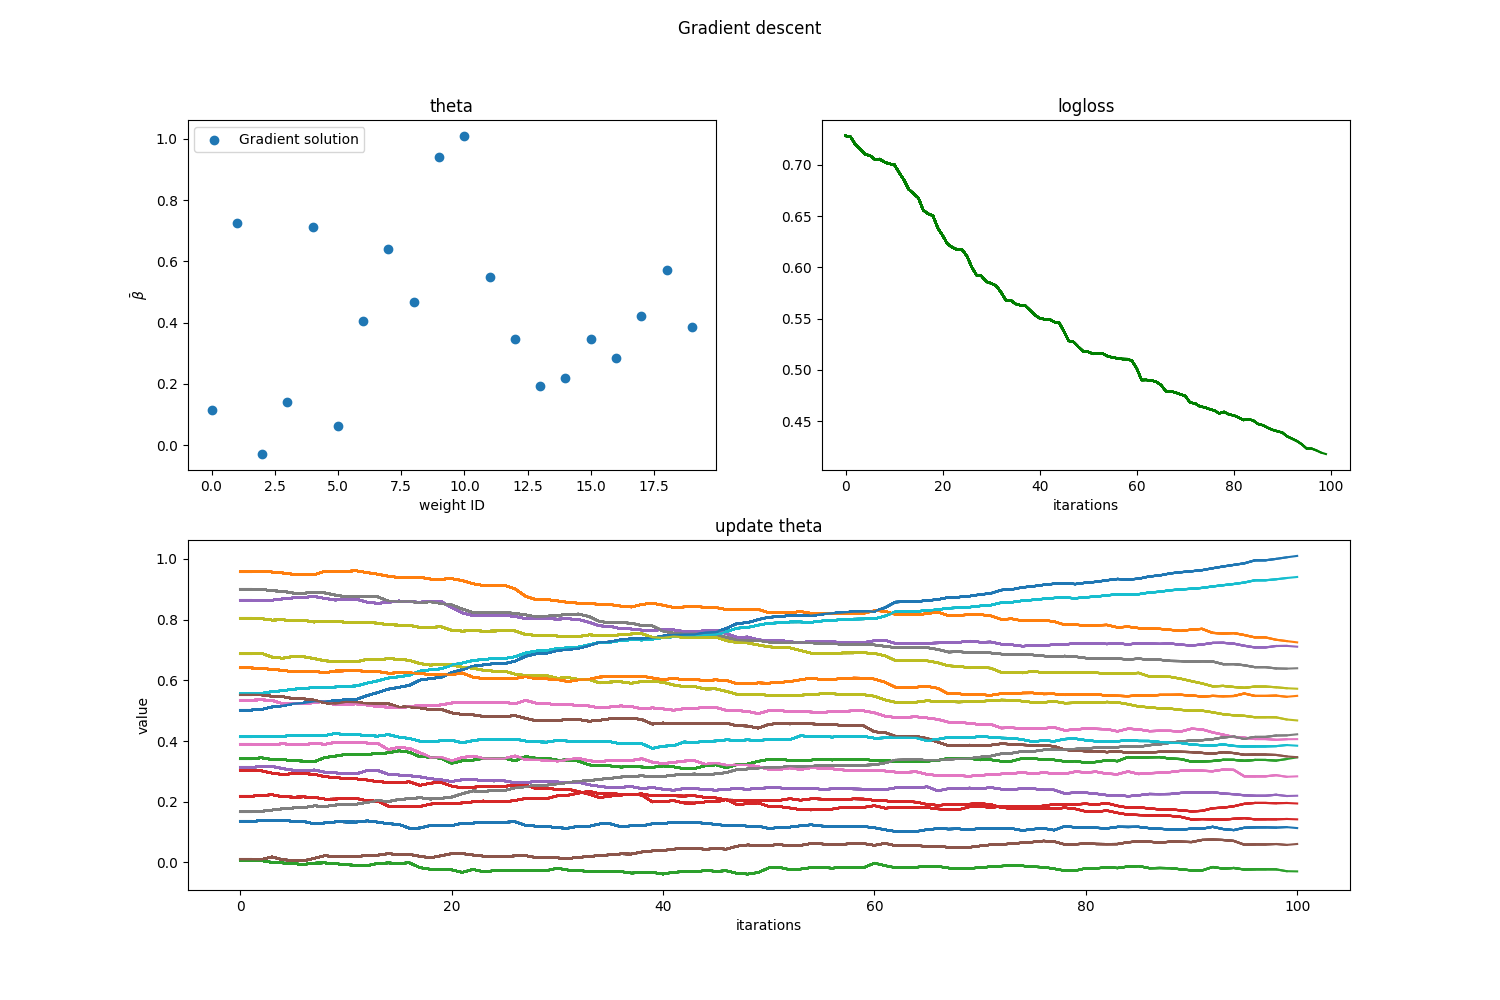

0.05721179443103119
0.13783663900105103
-0.038488369272252895
-0.09848521585936529
0.07227722989169395
-0.0891663959701885
-0.04905564860155793
0.10721592442022561
-0.010588982130017927
-0.09885315300799656
-0.12532287648068358
0.07982059837549693
0.06880572542606463
0.14659835777841404
-0.17977092154726246
0.1467329326564499
0.11372633682351972
-0.020009359202538355
0.07293748869983012
0.053990816122469025
0.7280978556047311
-0.055381347582244035
-0.03236038095269155
0.04072382095827732
-0.0475871696822211
0.02466044102156069
0.011792158853869934
-0.0163900361697925
-0.003322511512300172
-0.024030464329004284
-0.03192337117567606
-0.04296021329352698
0.02716260922512742
-0.05831319518928259
0.05004456073654704
-0.054330791674599616
0.0076881716744503815
-0.00655704503795353
-0.029126665139987698
0.021069771687681954
-0.011549917651119478
0.727304504548349
0.007548706331369221
0.049661873983008996
0.11412477976654407
-0.04784053523707569
-0.022693868467478753
-0.17505173694482107
0.031

0.005922139120530957
-0.03479150826553965
0.003313842341881203
-0.0006515162986329038
0.39524686308988877
-0.13762200327764357
-0.12886327872826583
0.1001269611758786
0.05901867217782161
-0.24815766069573214
-0.3180823315589434
0.006979321727560262
0.32061489381263303
0.24314441250461336
0.1073792311204483
0.23398440197615625
0.22504281422791128
-0.08188578772185508
0.23177805012115266
-0.03847026067936847
0.6383447420911713
-0.16329087890264424
0.12466677792046005
0.16207142995015028
-0.028301223423288252
0.35058247739944653
-0.002972403987535799
-0.020189801402946427
0.2678049830900113
0.15076853159386375
-0.13232782832863904
-0.18913644121352802
-0.10903440576678083
-0.1565727976821475
0.1243139147185201
-0.11397519152152169
0.10138054257820604
-0.2195124665847438
-0.22144755233388877
0.05392869925074404
0.1655158966945626
0.63095794643874
-0.00840722466463399
0.2052591561869139
-0.19141580238887757
-0.07220389072107329
0.17306307191329529
0.09054832171686059
-0.019442642356548967
0

-0.14337989288507483
-0.07493916037730752
-0.021776824947999516
0.12310835049916882
0.038760490243150994
-0.06932682617915069
-0.0602227758790137
0.019627188350133048
-0.00968220784365067
-0.05762825678166056
-0.06370957712724515
0.11838144866894221
0.022202119877137258
0.4501796974310823
-0.07109670388597462
0.29835150131464333
0.2289035705413018
0.0734811854667271
0.23741813838992956
0.3104689573407924
0.5581577606831992
-0.005108679843845537
0.1284216483390497
0.10950394408211656
-0.029287522809158136
-0.0917705698358532
-0.02831598653940864
0.06648651711956025
0.334556118095435
0.061935684314349065
-0.10099209461377595
-0.12928313706298986
0.11439808940960916
-0.09229226543339601
-0.024325940092265214
0.11101171390435592
-0.07331068590302751
0.09447249860991183
-0.03181290216080495
0.033984958143164434
-0.14912239420180595
0.5535239837756999
-0.0996485980281151
0.1500689379025579
-0.12428043107879155
0.03822996326720942
0.03973254034943647
-0.0922943437400536
0.08626367546056005
0.

0.001892457317664241
-0.017613878261850856
0.0013934598500260958
-0.03244150956726305
0.0015225459467781866
-0.031251584030053285
-0.029069424109872923
-0.015826457480438132
0.012857640615004415
-0.04325881355701016
-0.05583907430801584
-0.02911504251819101
0.012731061048071805
-0.003767033052169243
0.015700399378040686
0.02065284693124917
0.03242936774351629
-0.017835094893639384
-0.0009220721705873029
-0.000952001024288017
0.5106255471511699
-0.0025198532023392958
-0.009356419424042847
0.0009162237740990185
0.004107447130969344
-0.008852279856464215
-0.004319340472391835
0.0010629011778678444
0.0021749335162873393
-3.87747685793326e-05
-0.004545425610927795
-0.0056343756702485065
0.0027398658630598065
0.0030734221452532124
0.002457292402051517
0.005477483214480874
-0.000240417446395492
0.007458381822696102
0.00024716008738714213
-0.009503669572198808
-0.0039395085911510105
0.5105969920884827
0.07976210222080098
-0.17186283998399188
-0.29063929990208126
0.0890071171593952
-0.116691138

0.11766974824181556
0.08395573049066113
0.10523191950284826
0.02128508993715203
-0.05367031215134112
0.036874265180637765
-0.06325800046145125
0.055211495250129056
-0.06572618324079985
-0.05757145950325111
-0.07263174720511015
-0.004786900690519592
0.025176945966253406
-0.0990090321466687
0.00031110088357236623
0.055713042923660895
0.07241641645823618
-0.008415720692323742
0.006637203108077897
0.054397840915888764
0.46041814449331514
-0.2529709532732239
0.21789118500987922
0.125363568896811
-0.07351895012822139
-0.008246901419440776
0.19360366209089108
0.19333432923828495
-0.05145334462264798
0.11541939631387366
-0.027422216192597906
-0.03546001318495337
0.06832583705594605
0.09654764161300838
0.028731622094726985
0.2317169876775289
0.2320113281803431
0.019461001280935416
-0.011879926383970759
-0.055258668582527384
-0.14727553641943644
0.45765752851769426
0.06399214126250567
-0.009793040056867368
0.003862446031372913
0.07333991516598891
-0.08603399268260915
-0.01786720255059825
-0.0544

-0.02627761839583308
0.15473206478974189
-0.015487054241889626
0.07986858004543114
0.11046699232361745
-0.016560113910390164
0.08914683903768546
0.12597111872883496
0.09263581363562416
-0.14888445171027104
-0.19846452185333063
0.15967104805397747
-0.05589924815010682
-0.057119378373183496
0.03238515007765703
-0.013668278368199083
0.002352270501099621
-0.1185961496908516
-0.08176177690755604
-0.0047912331706222505
0.42340410814668283
-0.0017390754837110262
0.00025964890460971306
0.0003127872945345725
-0.001152927638960934
-0.00015053269686327335
0.0015639288914143928
0.0010811991846125743
-0.0011666374529058978
-0.00046111290998791706
-0.0012776778827739248
-0.0017716020637665057
-0.0006124059428246339
0.0010716685237547215
9.091050906218728e-05
-0.0008270024108195544
0.00043699983469942626
-0.0011701572281199537
-0.0016410626923940028
-0.0017299922215177567
-0.0017992949042333062
0.4233961581019803
0.01790005414023003
0.15561675417555995
0.0027732273629447776
0.001975266533710823
-0.09

In [35]:
optimal_theta = fit(X, y)

In [36]:
y_pred = binary_class_prediction(optimal_theta, X)

In [37]:
print("Test MAE = %.4f" % mean_absolute_error(y, y_pred))
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
print(f'Accuracy: %.3f, precision: %.3f, recall: %.3f\n' % (accuracy, precision, recall))

Test MAE = 0.1845
Accuracy: 0.816, precision: 0.810, recall: 0.826



### Выводы: все четыре модели при разных подходах дают приблизительно один и тот же результат. Это доказывает состоятельность применяемых методов.
### При отборе признаков стоит внимательно изучить их корреляцию с искомой величиной. Исходя из этой логики были отброшены категориальные признаки, поскольку они не улучшали качество нашей модели. Также не дала хороших результатов нормализация признаков.
### Среди всех моделей самой медленной оказалась модель KNN. Это лишний раз доказывает, что применение KD-деревьев является трудоемким процессом.